In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import os

## Q1a). A popular Two-Wheelers company claims that its best-selling model averages 18 km per litre of petrol. But recently a government agency used a sample of 80 two-wheelers of this model and finds the sample mean to be 16.8 km/litre. We also know from previous studies that the population standard deviation is 3 km/litre. Can we expect (within 2 standard errors) that we could select such a sample if indeed the population mean is 18 km/litre?

## Step 1: Given: n = 80, xbar = 16.8, σ = 3, μ = 18

## Step 2: Let us formulate the hypothesis. H0 : μ = 18

## H1 : μ < 18

## Step 3: Define the test statistic based on the information in the question. Here, we are going to use the Zstat since n>30 and μ is available.

## Let us calculate the value of the test statistic.

In [6]:
z = ((16.8-18)/(3/np.sqrt(80)))
z

-3.577708763999661

## From the value of the Zstat , we understand that this is a lower tailed-test.

## Step 4.1: Let us check the critical value with respect to α for the test statistic.

In [8]:
#The following code snippet helps us to calculate the value of the z-statistic from the z-table.

cv = stats.norm.ppf(0.05,0,1)
print(cv)

-1.6448536269514729


## Here, the calculated Zstat value is less than -1.64. Thus, this value falls in the rejection region.

## Hence, based on the given sample we need to reject the H0 (Null Hypothesis): μ (population mean) is equal to 18.

In [11]:
# Step 4.2: Let us calculate the p-value and compare it with α .
p_value = stats.norm.sf(abs(z))
p_value

0.00017330967556733473

## We see that the p-value < α . Thus, it is confirmed we need to reject the the null hypothesis.

## With 95% confidence (within 3 standard errors), we will need to reject the null hypothesis based on the given sample.

## Hence based on the on the prior knowledge that the μ (population mean) is equal to 18, we cannot select such a sample.

## Q2a). Marriott International is an American multinational diversified hospitality company that manages and franchises a broad portfolio of hotels and related lodging facilities. Every year, it provides a refresher course to its employees on "Hospitality Management and Emerging Trends". This training is being provided to all the three levels of management - Top, Middle & Bottom. The topic remains the same but the type of delivery varies with each level. The trainers believe that evaluations of the training session may vary with the audience. Few randomly selected evaluation scores from different levels of management who attended respective training sessions are given below (Here ratings are on a scale of 1 to 10 with 10 being the highest). 

## Assuming level of significance as 0.05, formulate the null and alternative hypotheses and determine which test statistic needs to be used. Also create a Decision Rule.

In [37]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\pairshare')
mydata=pd.read_csv("Marriot.csv")

In [45]:
mydata

,Level,Score
0,Top Level,8
1,Top Level,7
2,Top Level,6
3,Top Level,7
4,Top Level,9
5,Middle Level,8
6,Middle Level,7
7,Middle Level,6
8,Middle Level,9
9,Middle Level,10


In [46]:
mydata.describe()

,Score
count,18.000000
mean,7.500000
std,1.465285
min,5.000000
25%,6.250000
50%,7.000000
75%,8.750000
max,10.000000


In [44]:
mydata['Level'].unique()

array(['Top Level ', 'Middle Level ', 'Bottom Level'], dtype=object)

In [39]:
mydata['Level'].value_counts()

Bottom Level     7
Middle Level     6
Top Level        5
Name: Level, dtype: int64

## Formulating Hypothesis
## 𝐻0 : The mean evaluations of the training session for all three levels are same
## 𝐻1 : The mean evaluations of the training session for all three levels are different  

## Since there are more than two samples, anova technique needs to be used.

In [40]:
n=mydata.shape[0] #total no of observations
k=3 #no of groups

In [41]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 15


In [49]:
formula = 'Score ~ C(Level)'
model = ols(formula, mydata).fit()
aov_table = anova_lm(model)
print(aov_table)

            df     sum_sq   mean_sq         F    PR(>F)
C(Level)   2.0   4.466667  2.233333  1.045786  0.375681
Residual  15.0  32.033333  2.135556       NaN       NaN


## Since the p value is higher than the significance level, we cannot reject the null hypothesis. Hence it could be stated that there is not enough evidence to suggest that the evaluation scores varies with the level of audience. 

## Q3b). The table shows the quantity of soaps sold for different brands at different locations, collected over 20 days. Conduct a two-way ANOVA with interaction at α = 5% to test the effects of brands, locations and interaction on sales. (Ref attachment soaps.csv)


In [51]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\pairshare')
mydata1=pd.read_csv("SOAPS- Q3.csv")

In [52]:
mydata1.head()

,Loc,Brand,Qty
0,1,X,20
1,2,X,20
2,1,X,16
3,2,X,21
4,1,X,24


In [53]:
mydata1.tail()

,Loc,Brand,Qty
115,2,Z,32
116,1,Z,30
117,2,Z,29
118,1,Z,26
119,2,Z,22


In [54]:
mydata1.shape

(120, 3)

In [55]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Loc     120 non-null    int64 
 1   Brand   120 non-null    object
 2   Qty     120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [57]:
mydata1.isnull().sum()

Loc      0
Brand    0
Qty      0
dtype: int64

In [58]:
mydata1['Loc'].unique()

array([1, 2], dtype=int64)

In [59]:
mydata1['Loc'].value_counts()

2    60
1    60
Name: Loc, dtype: int64

In [60]:
mydata1['Brand'].unique()

array(['X', 'Y', 'Z'], dtype=object)

In [61]:
mydata1['Brand'].value_counts()

X    40
Y    40
Z    40
Name: Brand, dtype: int64

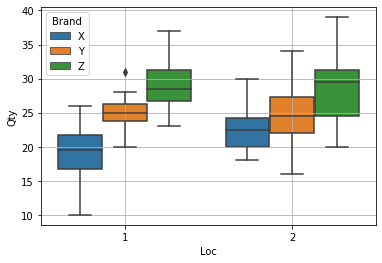

In [63]:
sns.boxplot(x="Loc", y="Qty", data=mydata1,hue='Brand')
plt.grid()
plt.show()

## Formulating Hypothesis

## 𝐻0  : The means of 'Qty' (Sales) variable with respect to each 'Loc' category and 'Brand' category is equal.

## 𝐻1 : At least one of the means of 'Qty' (Sales) variable with respect to each 'Loc' category and 'Brand' category is unequal.

In [65]:
mydata1.Loc=pd.Categorical(mydata1.Loc)
mydata1.Loc.value_counts()

2    60
1    60
Name: Loc, dtype: int64

In [66]:
formula = 'Qty ~ C(Loc) + C(Brand)'
model = ols(formula, mydata1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq     mean_sq          F        PR(>F)
C(Loc)      1.0     7.008333    7.008333   0.431358  5.126241e-01
C(Brand)    2.0  1240.316667  620.158333  38.170340  1.829940e-13
Residual  116.0  1884.666667   16.247126        NaN           NaN


## Considering both the factors(Location and Brand), Brand is a significant factor as the p value is <0.05 wheras Location is not a significant variable as p value of Loc is >0.05

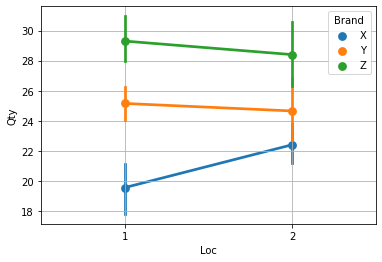

In [67]:
sns.pointplot(x = 'Loc', y = 'Qty', hue='Brand',data=mydata1)
plt.grid()
plt.show()

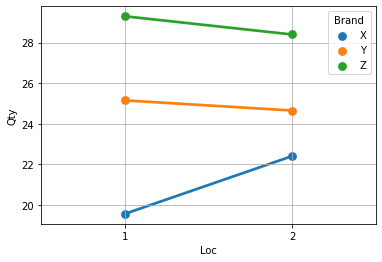

In [68]:
sns.pointplot(x = 'Loc', y = 'Qty', hue='Brand',data=mydata1, ci=None)
plt.grid()
plt.show()

## As seen from the above two interaction plots, there seems to be very less or negligible interaction amongst the two categorical variables.

In [69]:
#Interaction Effect:
formula = 'Qty ~ C(Loc) + C(Brand) + C(Loc):C(Brand)'
model = ols(formula, mydata1).fit()
aov_table = anova_lm(model)
print(aov_table)

                    df       sum_sq     mean_sq          F        PR(>F)
C(Loc)             1.0     7.008333    7.008333   0.443898  5.065930e-01
C(Brand)           2.0  1240.316667  620.158333  39.279968  1.055160e-13
C(Loc):C(Brand)    2.0    84.816667   42.408333   2.686085  7.246036e-02
Residual         114.0  1799.850000   15.788158        NaN           NaN


## As gender and diet interaction is 0.0724 which is >0.05 , there seems to be almost no statistical interaction.